## Data cleaning and loading

In [2]:
# Load my dataset using pandas Dataframe
import pandas as pd

wis_data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
wis_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Dataset Descriptiion
1) ID number

2) Diagnosis (M = malignant, B = benign) 3-32)


Ten real-valued features are computed for each cell nucleus:

==============================================  
a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths) 平滑度

f) compactness (perimeter^2 / area - 1.0) 紧密度

g) concavity (severity of concave portions of the contour) 凹度

h) concave points (number of concave portions of the contour) 凹点

i) symmetry 对称性

j) fractal dimension ("coastline approximation" - 1)

In [4]:
wis_data.shape

(569, 33)

In [5]:
wis_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
wis_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
wis_data['diagnosis'] = labelencoder.fit_transform(wis_data['diagnosis'].values)
wis_data['diagnosis'].value_counts()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0    357
1    212
Name: diagnosis, dtype: int64

## Get correlations with diagnosis feature

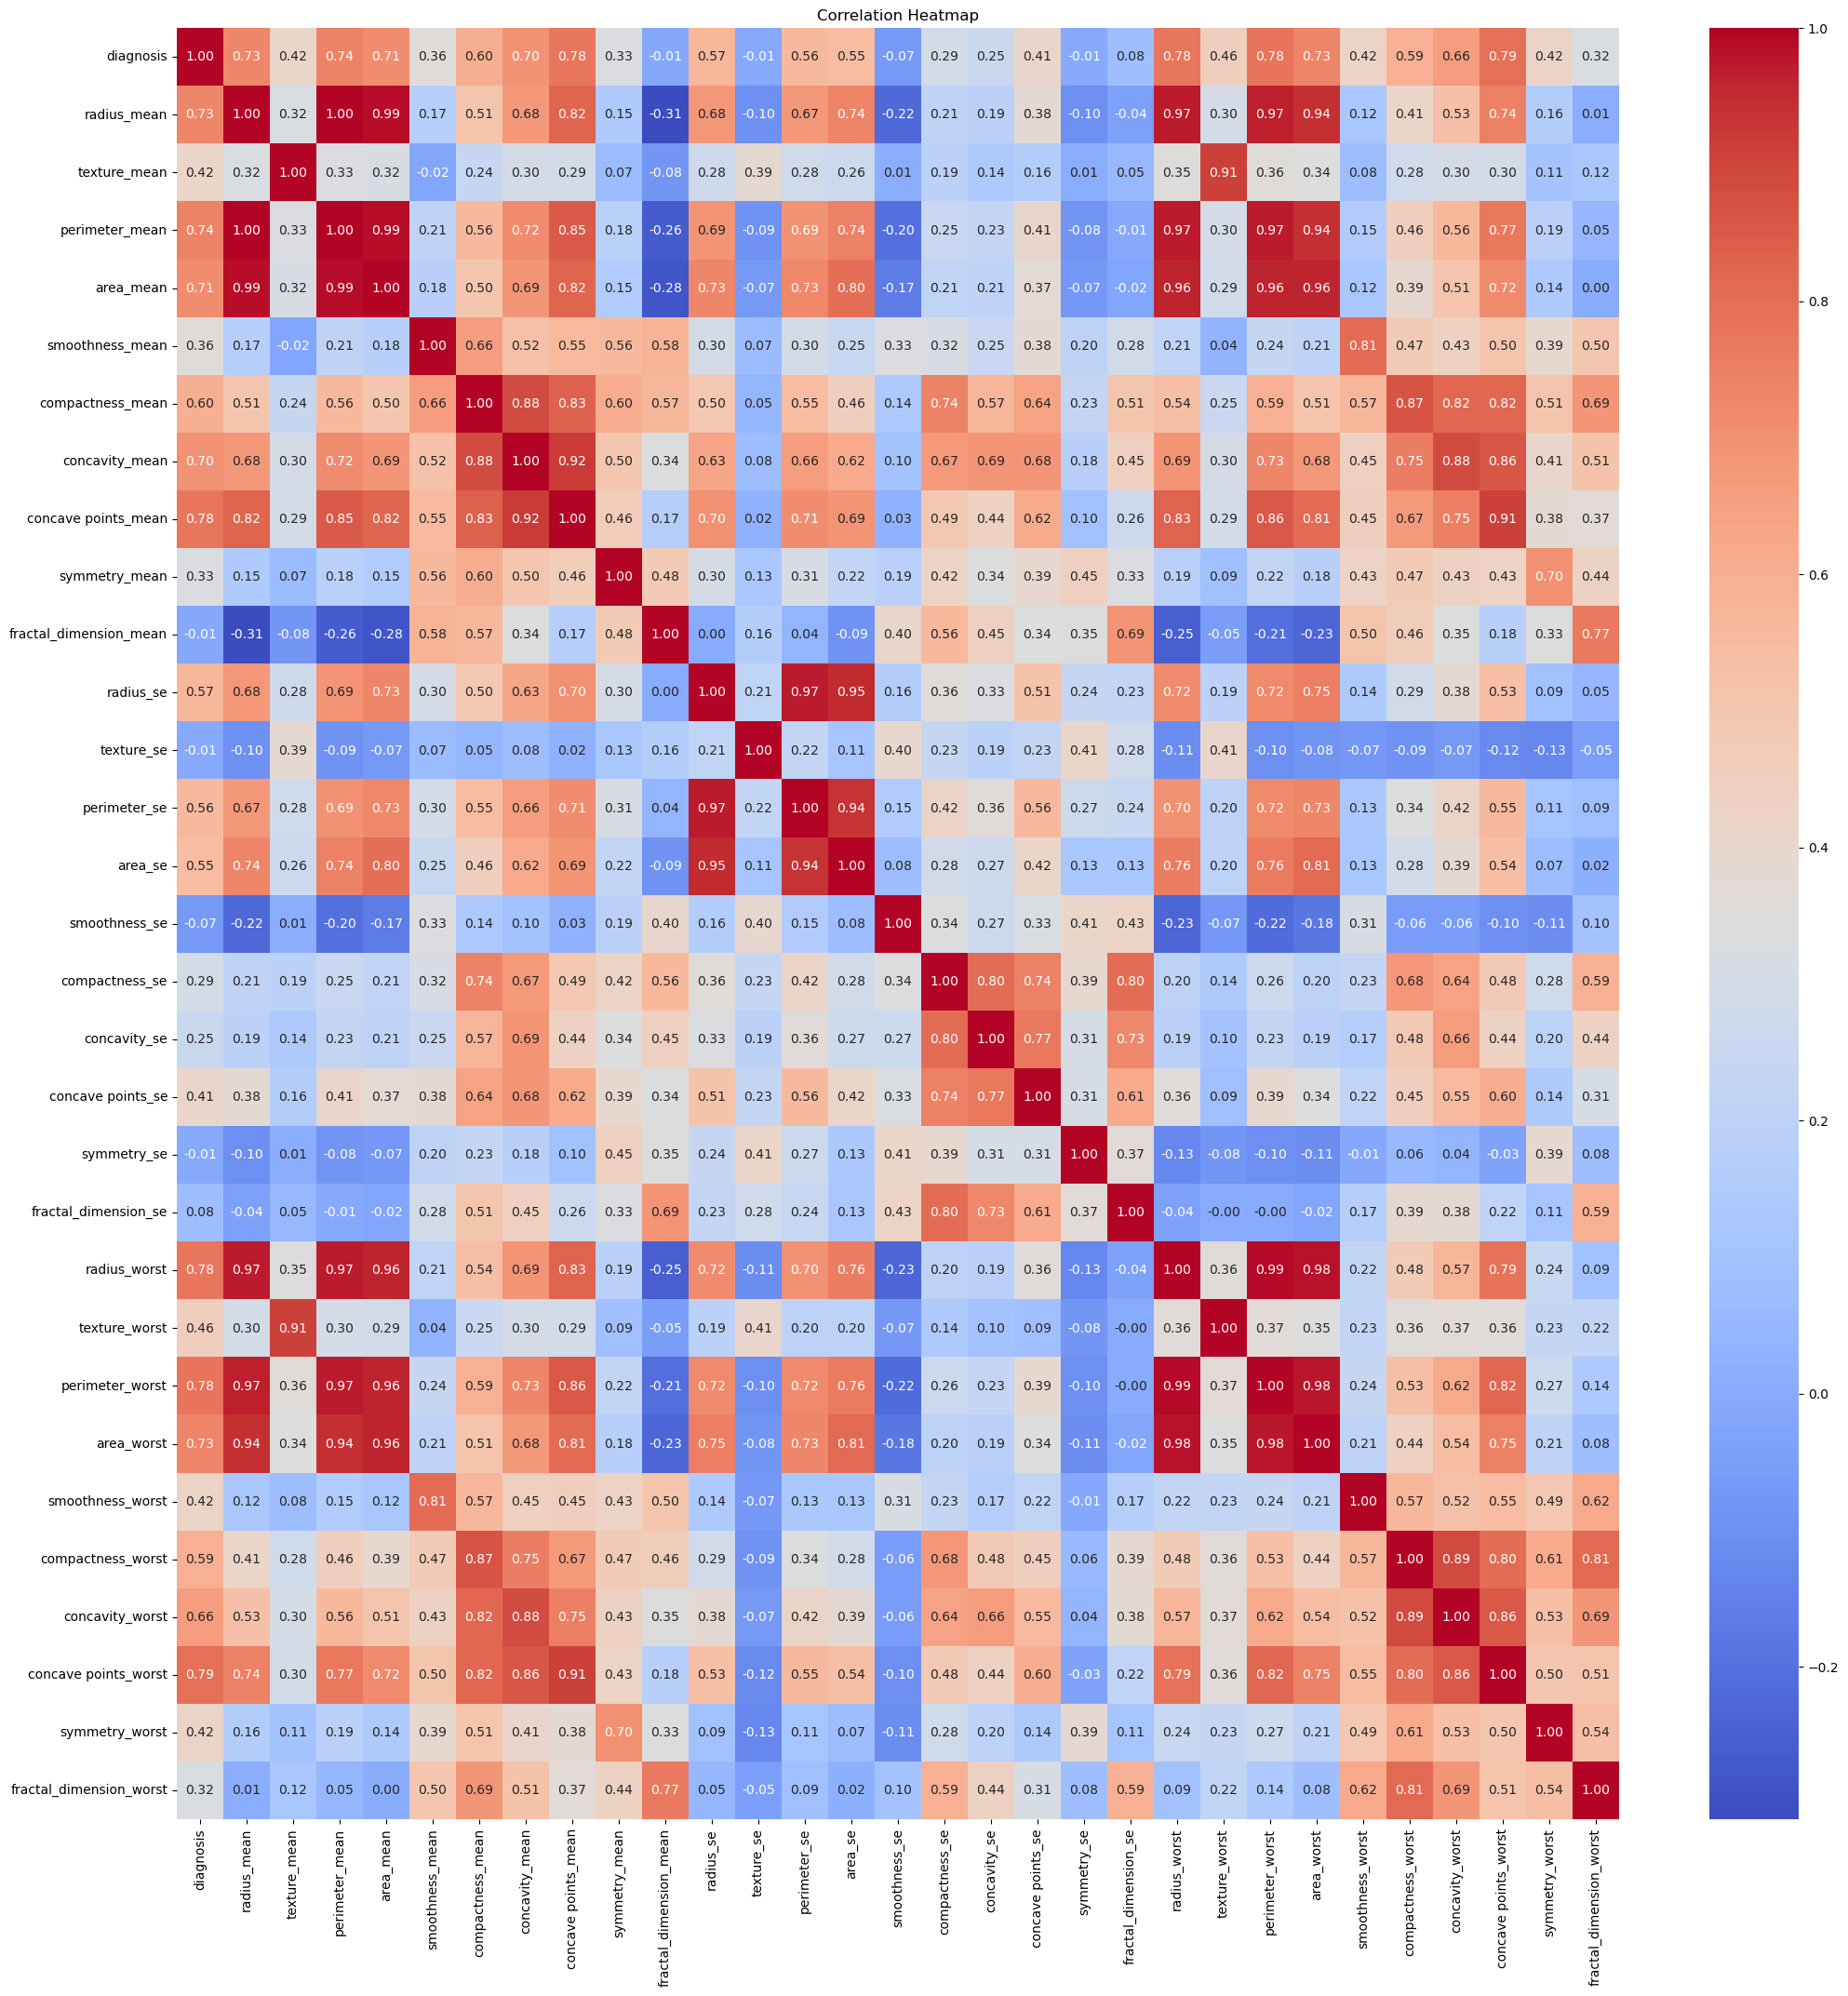

In [9]:
#Find features that show visible correlations to each other
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
clean_data = wis_data.drop('Unnamed: 32', axis=1)
data = clean_data.drop('id',axis=1)

correlation_matrix = data.corr()

#heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#drop id, Unamed:32 feature
data.shape

(569, 31)

In [11]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
data.corrwith(data['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [13]:
# remove low correlations, get high correlations with diagnosis
cols = [
'fractal_dimension_se',
'smoothness_se',
'fractal_dimension_mean',
'texture_se',
'symmetry_se']

high_corr = data.drop(cols, axis=1)

In [14]:
high_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Prepare for Machine Learning

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop(columns=['diagnosis']).values
y = data['diagnosis'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert the target variable y to binary labels (0 and 1) for binary classification
y_binary = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# eXtreme Gradient Boosting Classifier (XGBoost)
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# Support Vector Machine (SVM) Classifier
svm_clf = SVC(random_state=42,probability=True)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

# Calculate metrics for each model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

# Print the metrics for each model
print("KNN Classifier:")
print(f"Accuracy: {knn_accuracy:.3f}, Precision: {knn_precision:.3f}, Recall: {knn_recall:.3f}, F1 Score: {knn_f1:.3f}")
print("---------------------------------------------------")

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.3f}, Precision: {rf_precision:.3f}, Recall: {rf_recall:.3f}, F1 Score: {rf_f1:.3f}")
print("---------------------------------------------------")

print("XGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy:.3f}, Precision: {xgb_precision:.3f}, Recall: {xgb_recall:.3f}, F1 Score: {xgb_f1:.3f}")
print("---------------------------------------------------")

print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.3f}, Precision: {dt_precision:.3f}, Recall: {dt_recall:.3f}, F1 Score: {dt_f1:.3f}")
print("---------------------------------------------------")

print("Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {svm_accuracy:.3f}, Precision: {svm_precision:.3f}, Recall: {svm_recall:.3f}, F1 Score: {svm_f1:.3f}")
print("---------------------------------------------------")


KNN Classifier:
Accuracy: 0.947, Precision: 0.930, Recall: 0.930, F1 Score: 0.930
---------------------------------------------------
Random Forest Classifier:
Accuracy: 0.965, Precision: 0.976, Recall: 0.930, F1 Score: 0.952
---------------------------------------------------
XGBoost Classifier:
Accuracy: 0.956, Precision: 0.952, Recall: 0.930, F1 Score: 0.941
---------------------------------------------------
Decision Tree Classifier:
Accuracy: 0.947, Precision: 0.930, Recall: 0.930, F1 Score: 0.930
---------------------------------------------------
Support Vector Machine (SVM) Classifier:
Accuracy: 0.974, Precision: 0.976, Recall: 0.953, F1 Score: 0.965
---------------------------------------------------


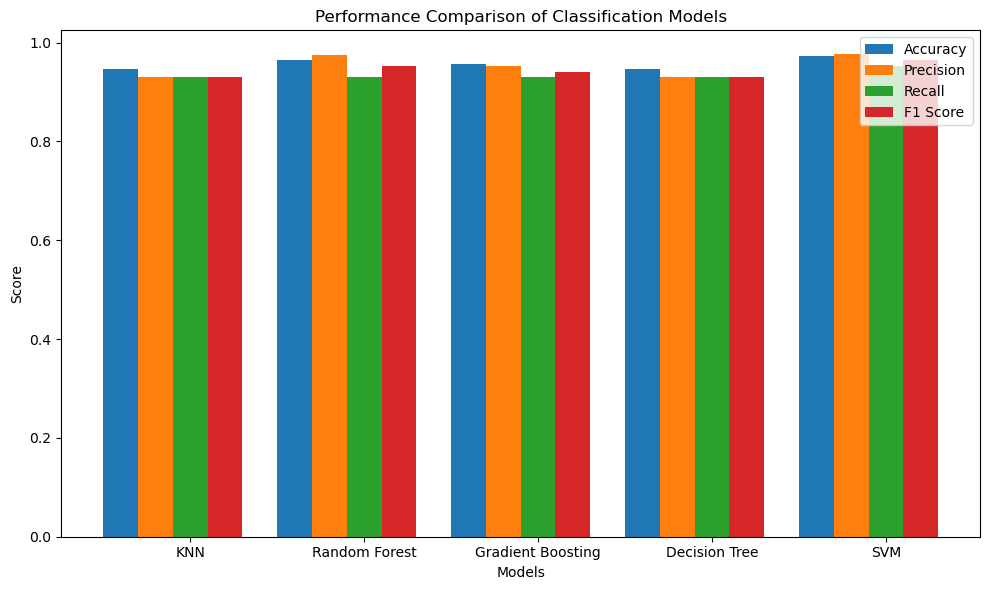

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for each model
models = [knn, rf, xgb_clf, dt_clf, svm_clf]
model_names = ['KNN', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]
precision_scores = [precision_score(y_test, model.predict(X_test)) for model in models]
recall_scores = [recall_score(y_test, model.predict(X_test)) for model in models]
f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]

# Define bar width and positions
bar_width = 0.2
x_indices = np.arange(len(model_names))

# Plot the performance metrics with adjusted positions
plt.figure(figsize=(10, 6))
plt.bar(x_indices - 2*bar_width, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(x_indices - bar_width, precision_scores, width=bar_width, label='Precision')
plt.bar(x_indices, recall_scores, width=bar_width, label='Recall')
plt.bar(x_indices + bar_width, f1_scores, width=bar_width, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison of Classification Models')
plt.xticks(x_indices, model_names)
plt.legend()
plt.tight_layout()
plt.show()


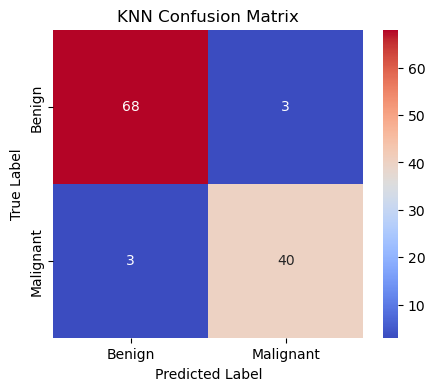

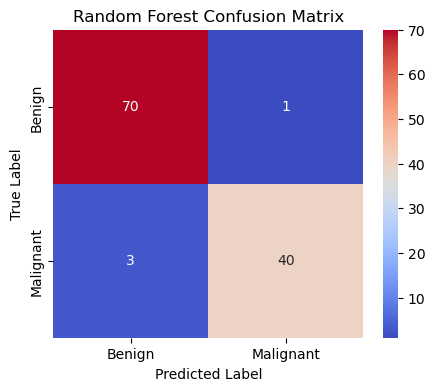

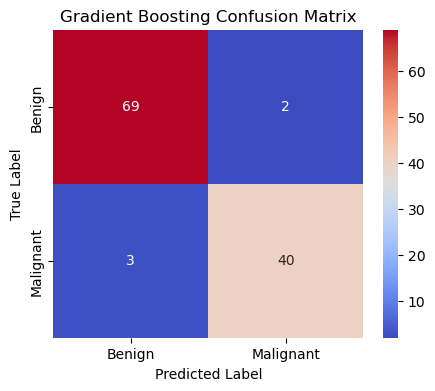

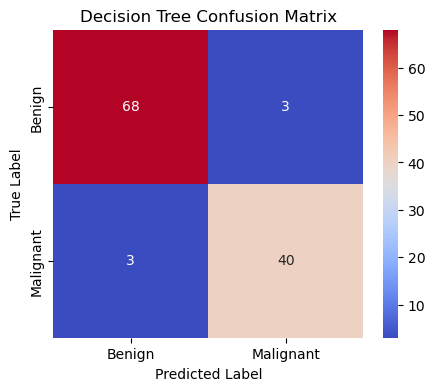

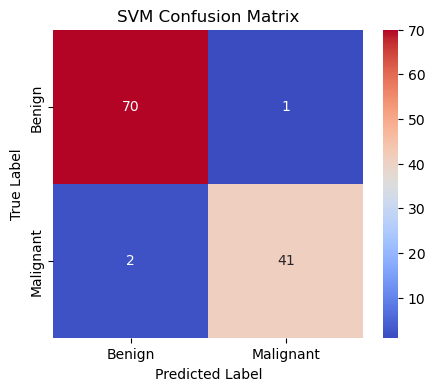

KNN Precision: 0.930
Random Forest Precision: 0.976
Gradient Boosting Precision: 0.952
Decision Tree Precision: 0.930
SVM Precision: 0.976
-------------------------------------
KNN Recall: 0.930
Random Forest Recall: 0.930
Gradient Boosting Recall: 0.930
Decision Tree Recall: 0.930
SVM Recall: 0.953


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a list of predicted labels for all models
y_predict_list = [knn_pred, rf_pred, xgb_pred, dt_pred, svm_pred]

# Create a list of model names for the heatmap
model_names = ['KNN', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'SVM']

# Create a heatmap for each model's confusion matrix
for i, y_predict in enumerate(y_predict_list):
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'{model_names[i]} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Calculate and print accuracy for each model
precision_list = [precision_score(y_test, y_predict) for y_predict in y_predict_list]
for i, model_name in enumerate(model_names):
    print(f'{model_name} Precision: {precision_list[i]:.3f}')
print("-------------------------------------")
recall_list = [recall_score(y_test, y_predict) for y_predict in y_predict_list]
for i, model_name in enumerate(model_names):
    print(f'{model_name} Recall: {recall_list[i]:.3f}')


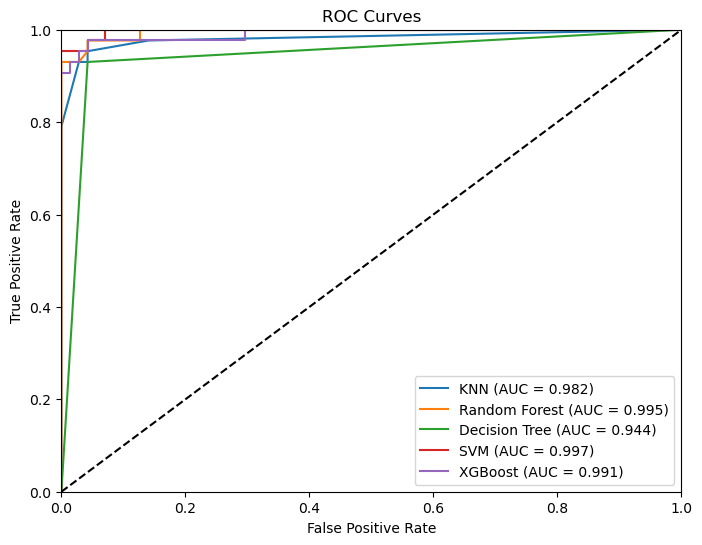

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves and calculate AUC for each model
plt.figure(figsize=(8, 6))
model_names = ["KNN", "Random Forest", "Decision Tree", "SVM", "XGBoost"]
for i, (model, model_name) in enumerate(zip([knn, rf, dt_clf, svm_clf, xgb_clf], model_names)):
    if model_name == 'Decision Tree':
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
